<a href="https://colab.research.google.com/github/saharCoder/DataAnalysis/blob/main/EDULat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading the kaggle dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
! mkdir ~/.kaggle
! cp /content/gdrive/MyDrive/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Mounted at /content/gdrive


In [ ]:
! kaggle datasets download satyampd/india-literacy-data-district-wise

  0% 0.00/7.95k [00:00<?, ?B/s]
100% 7.95k/7.95k [00:00<00:00, 20.6MB/s]


In [ ]:
! unzip india-literacy-data-district-wise.zip

Archive:  india-literacy-data-district-wise.zip
  inflating: Literacy Data 2011.csv  


## Import librabies and loading the dataset into a dataframe

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [ ]:
df=pd.read_csv('Literacy Data 2011.csv')

## Understanding the data

### View the data and get the basic information

In [ ]:
df.head(5)

,Unnamed: 0,District,State,Literacy
0,1,Thane,Maharashtra,84.53
1,2,North Twenty Four Parganas,West Bengal,84.06
2,3,Bangalore,Karnataka,87.67
3,4,Pune,Maharashtra,86.15
4,5,Mumbai Suburban,Maharashtra,89.91


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  640 non-null    int64  
 1   District    640 non-null    object 
 2   State       640 non-null    object 
 3   Literacy    640 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 20.1+ KB


### Checking null values

In [ ]:
df.isnull().sum()

Unnamed: 0    0
District      0
State         0
Literacy      0
dtype: int64

### Checking duplicate values

In [ ]:
df.duplicated().sum()

0

## Model data distribution

<Axes: >

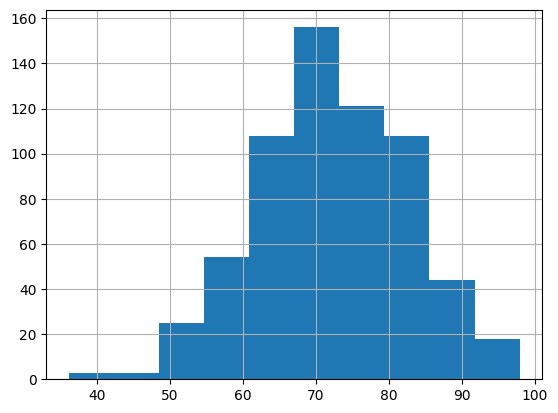

In [ ]:
df['Literacy'].hist()

- This looks like the normal distribution

### compute the mean and the std

In [ ]:
mean_df=df['Literacy'].mean()
std_df=df['Literacy'].std()

### Empirical Rule Checking

In [ ]:
#One std
lowerlimit=mean_df-1*std_df
upperlimit=mean_df+1*std_df
((df['Literacy']>=lowerlimit) & (df['Literacy']<= upperlimit)).mean()*100

65.78125

In [ ]:
#Two std
lowerlimit=mean_df-2*std_df
upperlimit=mean_df+2*std_df
((df['Literacy']>=lowerlimit) & (df['Literacy']<= upperlimit)).mean()*100

95.15625

In [ ]:
#Three std
lowerlimit=mean_df-3*std_df
upperlimit=mean_df+3*std_df
((df['Literacy']>=lowerlimit) & (df['Literacy']<= upperlimit)).mean()*100

99.84375

- This data fit the empirical rule

### Detecting outliers using Z-Score

In [ ]:
df['zscore']=stats.zscore(df['Literacy'])

In [ ]:
#Now filter the rows with +3 and -3
((df['zscore']>3) & (df['zscore']<-3)).sum()

0

- There is not outlier

## Sampling the data

In [ ]:
sample_data=df.sample(n=50,replace=True,random_state=32190)

In [ ]:
sample_data.head(5)

,Unnamed: 0,District,State,Literacy,zscore
172,173,Mirzapur,Uttar Pradesh,68.48,-0.365286
555,556,Thoubal,Manipur,74.47,0.206245
601,602,South Garo Hills,Meghalaya,71.72,-0.056144
535,536,Panchkula,Haryana,81.88,0.913265
501,502,Arwal,Bihar,67.43,-0.465471


In [ ]:
sample_mean=sample_data['Literacy'].mean()

In [ ]:
sample_mean

70.169

In [ ]:
import math

In [ ]:
#dividing the standard deviation by the sample size's square root to get the standard error
std_error=sample_data['Literacy'].std()/math.sqrt(sample_data.shape[0])

In [ ]:
#calcaulate the conf intervals
Conf_interval=stats.norm.interval(0.95,sample_mean,std_error)

In [ ]:
Conf_interval

(67.32959603140873, 73.00840396859127)

In [ ]:
#The mean of the whole dataset:
print("The mean of the whole dataset: ",mean_df)

The mean of the whole dataset:  72.308421875


In [ ]:
print(5)

5
